In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import umap.umap_ as umap
import umap.plot

from utils import *

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset, Dataset

In [3]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=250)

In [4]:
MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [5]:
dataset = load_dataset('glue', 'sst2', split='train[-10%:]')
dataset.rename_column_('sentence', 'text')
dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))

Reusing dataset glue (C:\Users\Fabrice\.cache\huggingface\datasets\glue\sst2\1.0.0\7c99657241149a24692c402a5c3f34d4c9f1df5ac2e4c3759fadea38f6cb29c4)


In [6]:
mapper = umap.UMAP().fit(dataset['input_ids'])

<AxesSubplot:>

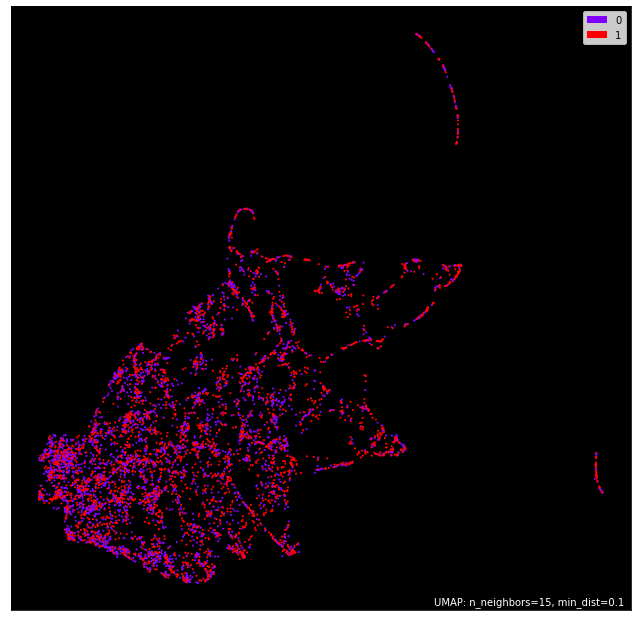

In [7]:
umap.plot.points(mapper, labels=np.array(dataset['label']), theme='fire')

In [8]:
dataset = load_dataset('ag_news', split='train')
dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))

Using custom data configuration default
Reusing dataset ag_news (C:\Users\Fabrice\.cache\huggingface\datasets\ag_news\default\0.0.0\fb5c5e74a110037311ef5e904583ce9f8b9fbc1354290f97b4929f01b3f48b1a)


In [9]:
mapper = umap.UMAP().fit(dataset['input_ids'])

<AxesSubplot:>

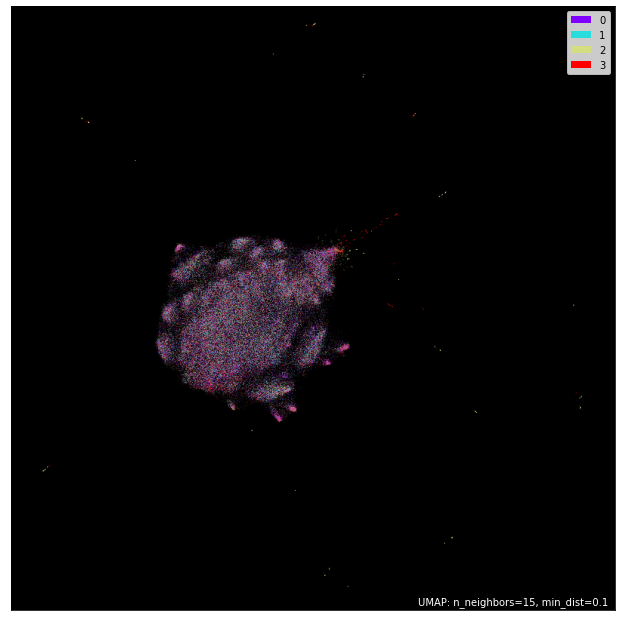

In [10]:
umap.plot.points(mapper, labels=np.array(dataset['label']), theme='fire')

# UMAP on Transformed Datasets

In [82]:
def flatten_sib(labels, sib_val=0.5):
    new_label = []
    for i in range(len(labels)):
        if type(labels[i]) == int:
            new_label.append(labels[i])
        elif any([x>0 and x<1 for x in labels[i]]):
                new_label.append(sib_val)
        else:
            new_label.append(np.array(labels[i]).argmax())   
    return new_label    

assets/SST2\INV\text.npy assets/SST2\INV\label.npy


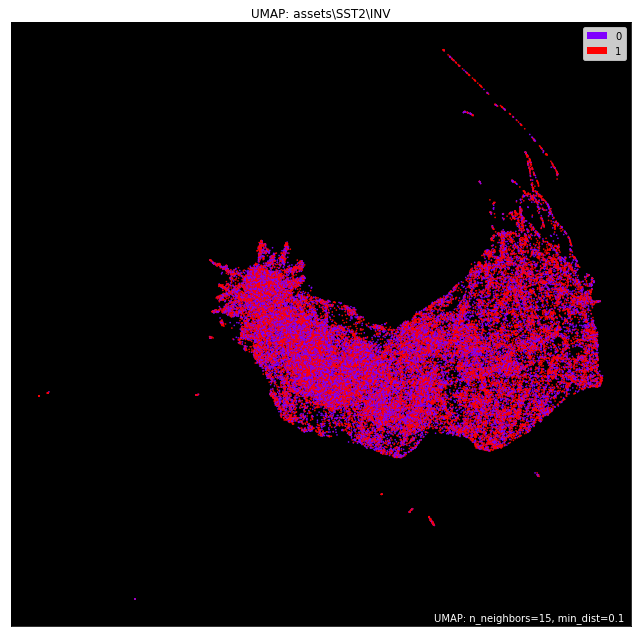

assets/SST2\INVSIB\text.npy assets/SST2\INVSIB\label.npy


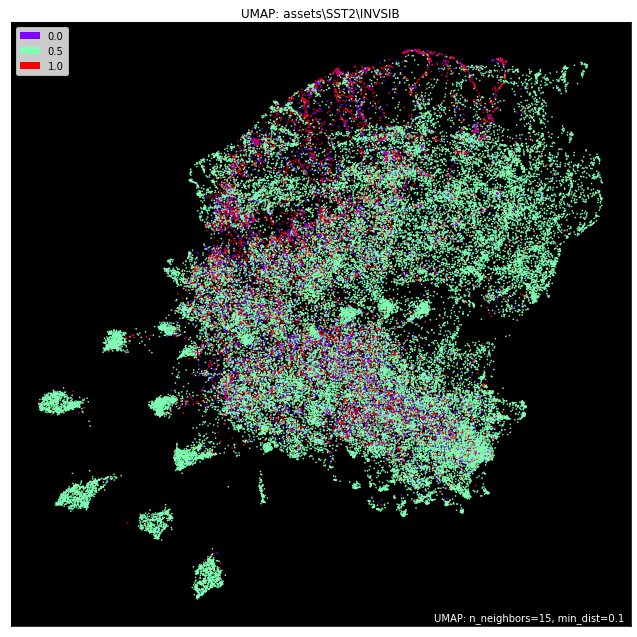

assets/SST2\ORIG\text.npy assets/SST2\ORIG\label.npy


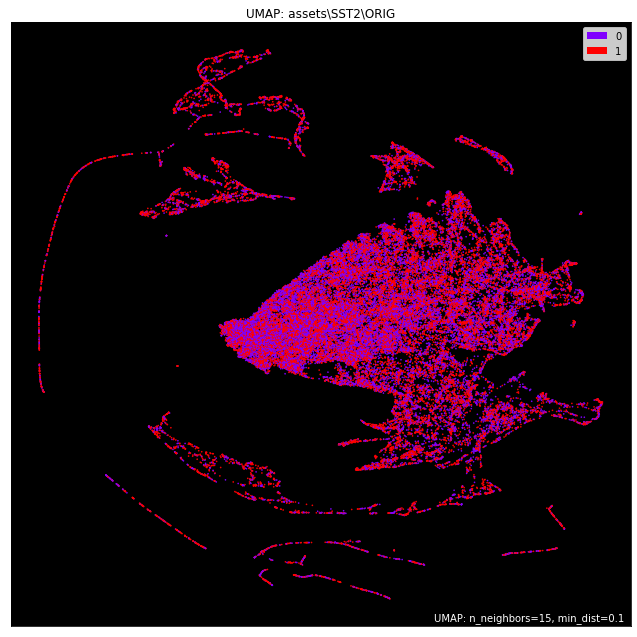

assets/SST2\SentMix\text.npy assets/SST2\SentMix\label.npy


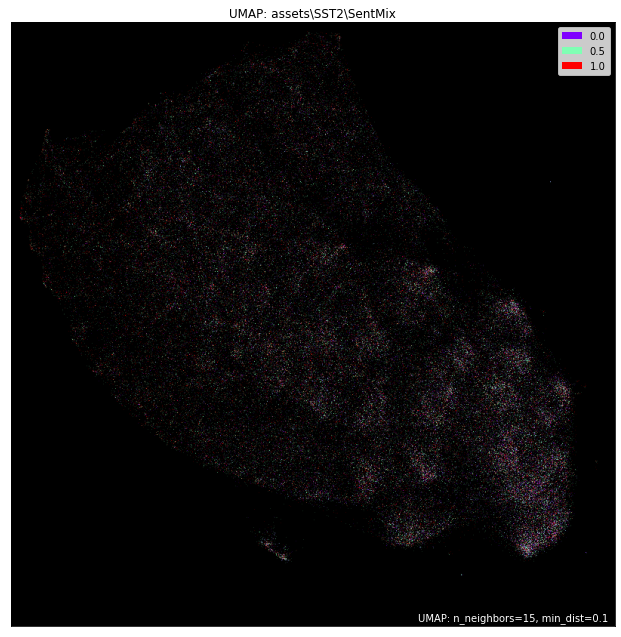

assets/SST2\SIB\text.npy assets/SST2\SIB\label.npy


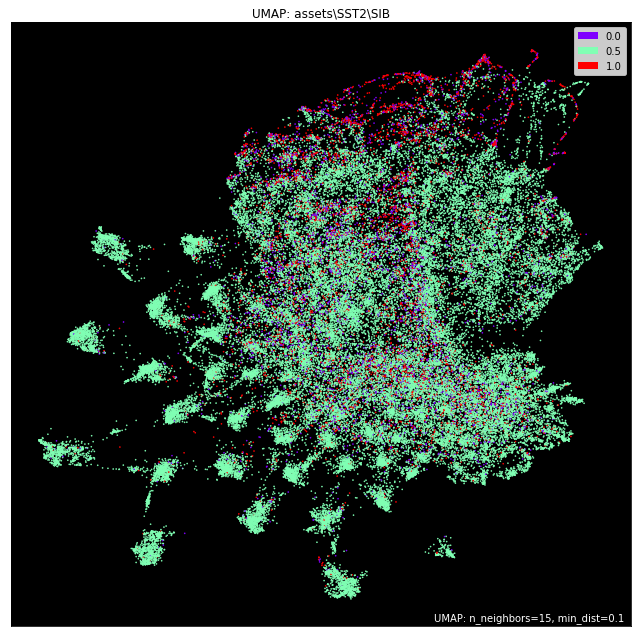

assets/SST2\TextMix\text.npy assets/SST2\TextMix\label.npy


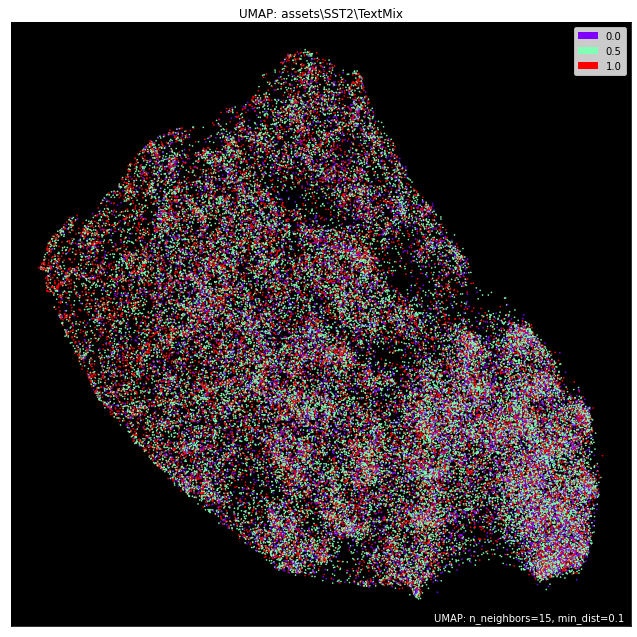

assets/SST2\WordMix\text.npy assets/SST2\WordMix\label.npy


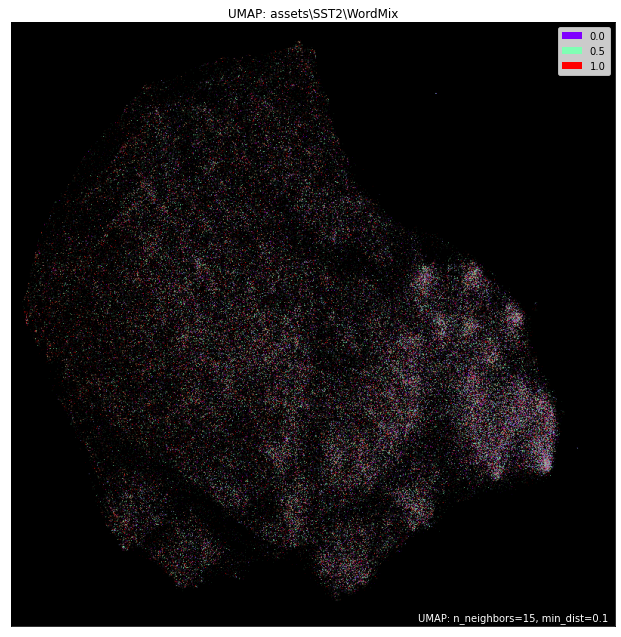

In [64]:
dataset_paths = parse_path_list("assets/SST2", 'assets')
text_paths = [x for x in dataset_paths if 'text' in x]
label_paths = [x for x in dataset_paths if 'label' in x]

for t, l in zip(text_paths, label_paths):
    print(t, l)
    text = npy_load(t)
    label = npy_load(l)
    if len(label.shape) > 1:
        df = pd.DataFrame({'text': text, 'label': label.tolist()})
        df.text = df.text.astype(str)
        df.label = df.label.map(lambda y: np.array(y))
    else:
        df = pd.DataFrame({'text': text, 'label': label})
        df.text = df.text.astype(str)
        df.label = df.label.astype(int)
    dataset = Dataset.from_pandas(df) 
    dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))
    mapper = umap.UMAP().fit(dataset['input_ids'])
    umap.plot.points(mapper, labels=np.array(flatten_sib(dataset['label'])), theme='fire')
    plt.title('UMAP: ' + os.path.dirname(t.replace('/', '\\')))
    plt.show()

assets/AG_NEWS\INV\text.npy assets/AG_NEWS\INV\label.npy


C:\Users\Fabrice\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


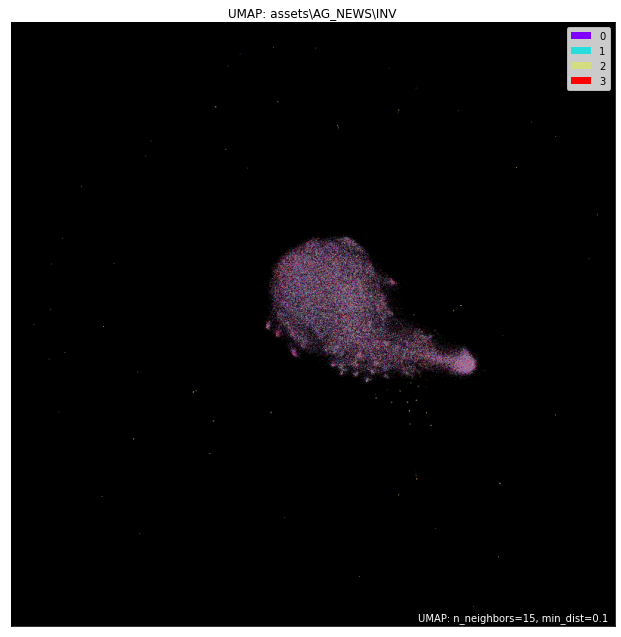

assets/AG_NEWS\INVSIB\text.npy assets/AG_NEWS\INVSIB\label.npy


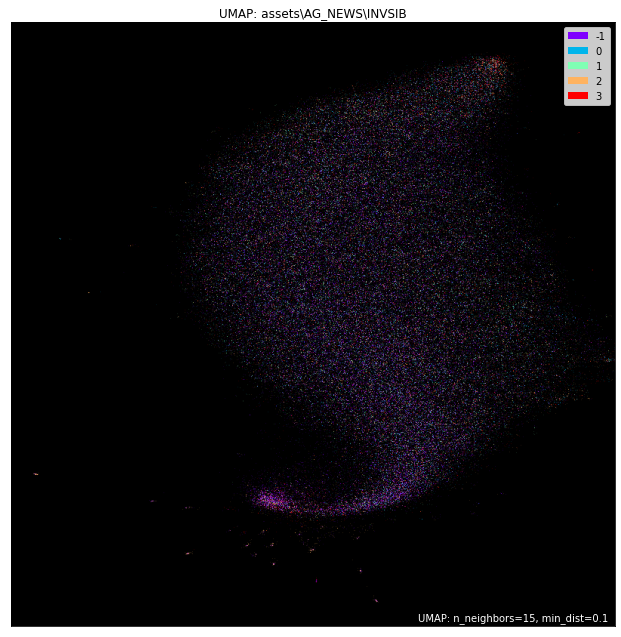

assets/AG_NEWS\ORIG\text.npy assets/AG_NEWS\ORIG\label.npy


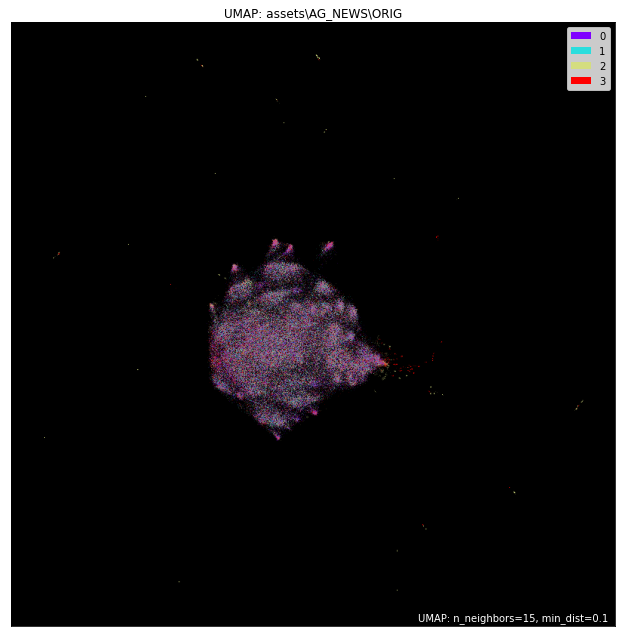

assets/AG_NEWS\SentMix\text.npy assets/AG_NEWS\SentMix\label.npy


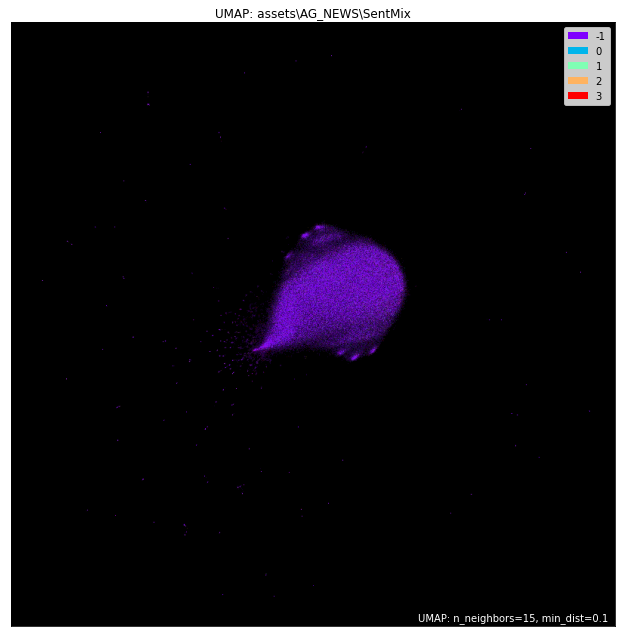

assets/AG_NEWS\SIB\text.npy assets/AG_NEWS\SIB\label.npy


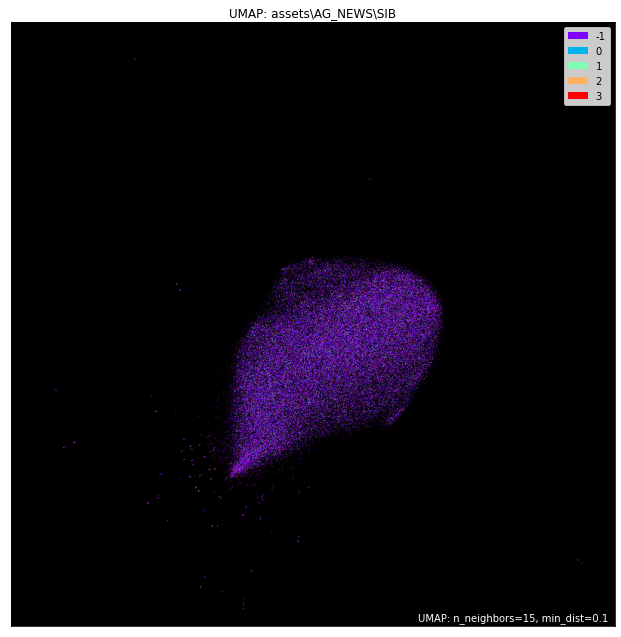

assets/AG_NEWS\TextMix\text.npy assets/AG_NEWS\TextMix\label.npy


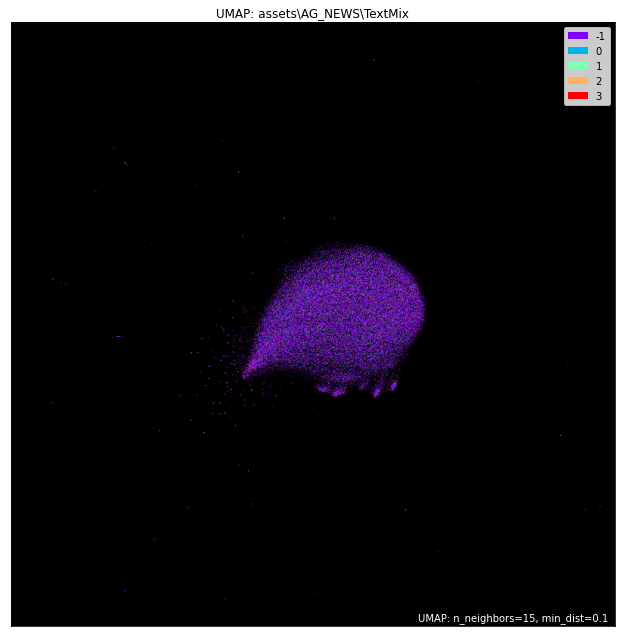

assets/AG_NEWS\WordMix\text.npy assets/AG_NEWS\WordMix\label.npy


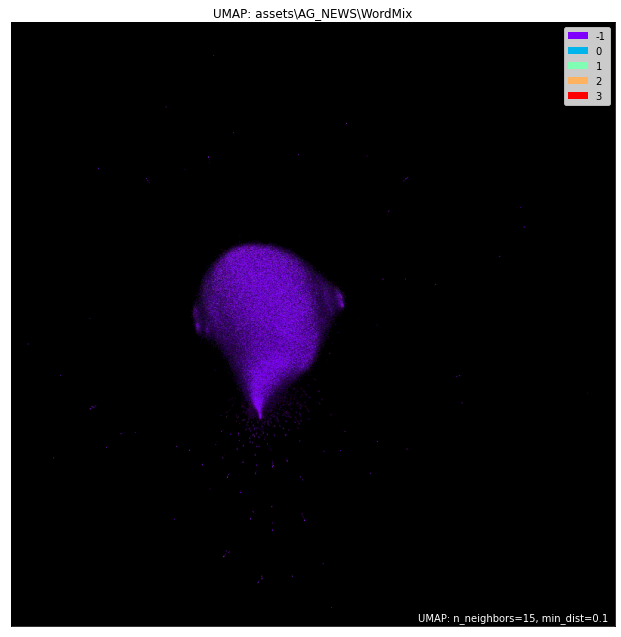

In [83]:
dataset_paths = parse_path_list("assets/AG_NEWS", 'assets')
text_paths = [x for x in dataset_paths if 'text' in x]
label_paths = [x for x in dataset_paths if 'label' in x]

for t, l in zip(text_paths, label_paths):
    print(t, l)
    text = npy_load(t)
    label = npy_load(l)
    if len(label.shape) > 1:
        df = pd.DataFrame({'text': text, 'label': label.tolist()})
        df.text = df.text.astype(str)
        df.label = df.label.map(lambda y: np.array(y))
    else:
        df = pd.DataFrame({'text': text, 'label': label})
        df.text = df.text.astype(str)
        df.label = df.label.astype(int)
    dataset = Dataset.from_pandas(df) 
    dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))
    mapper = umap.UMAP().fit(dataset['input_ids'])
    umap.plot.points(mapper, labels=np.array(flatten_sib(dataset['label'], -1)), theme='fire')
    plt.title('UMAP: ' + os.path.dirname(t.replace('/', '\\')))
    plt.show()

# Label Distributions

In [37]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

In [97]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax): 
        total = sum([p.get_height() for p in ax.patches])
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + p.get_height() / 50
            value = '{:.2f}%'.format((p.get_height()/total)*100)
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

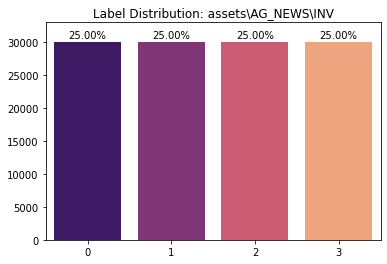

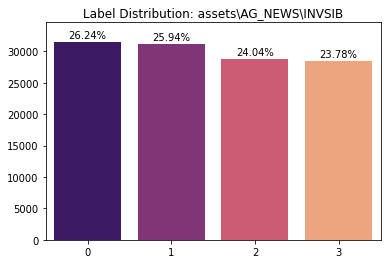

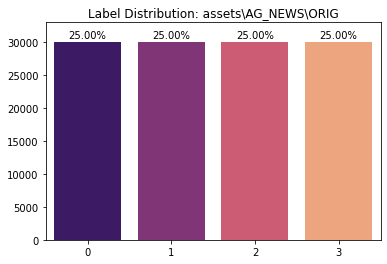

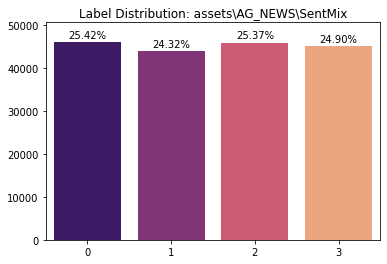

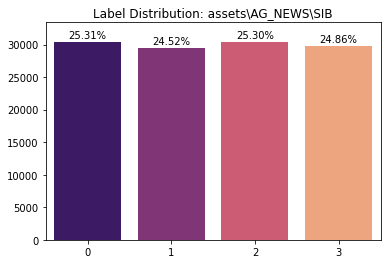

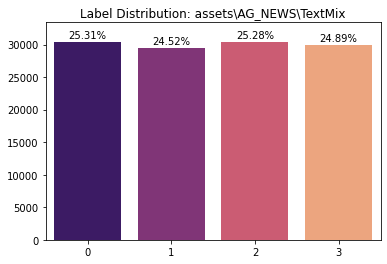

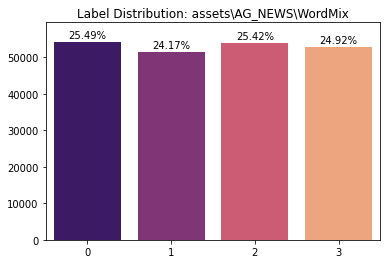

In [100]:
dataset_paths = parse_path_list("assets/AG_NEWS", 'assets')
label_paths = [x for x in dataset_paths if 'label' in x]
for p in label_paths:
    labels = npy_load(p)
    if len(labels.shape) == 1:
        x, y = np.unique(labels, return_counts=True)
    else:
        x = list(range(labels.shape[1]))
        y = labels.sum(axis=0)
    ax=sns.barplot(x=x,y=y, palette='magma')
    ax.set_title("Label Distribution: " + os.path.dirname(p).replace("/", "\\"))
    ax.set_ylim(0, max(y)+max(y)/10)
    show_values_on_bars(ax)
    plt.show()

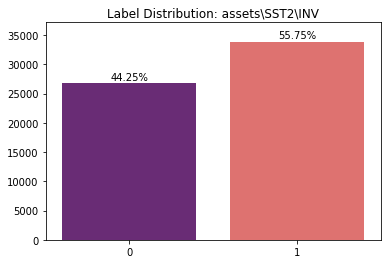

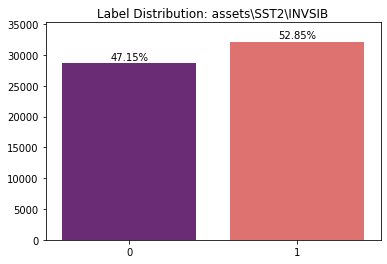

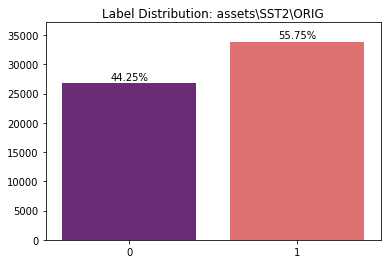

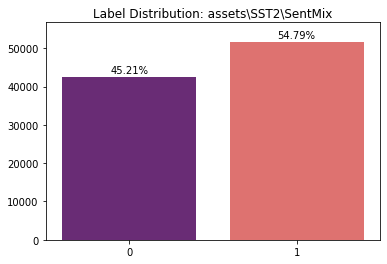

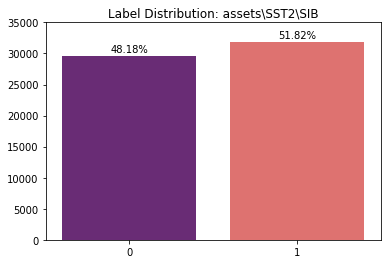

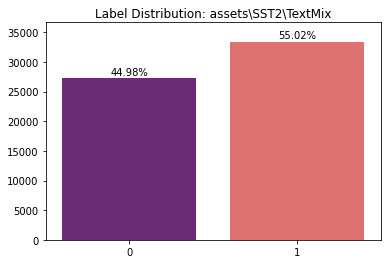

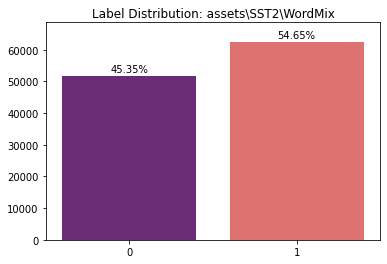

In [99]:
dataset_paths = parse_path_list("assets/SST2", 'assets')
label_paths = [x for x in dataset_paths if 'label' in x]
for p in label_paths:
    labels = npy_load(p)
    if len(labels.shape) == 1:
        x, y = np.unique(labels, return_counts=True)
    else:
        x = list(range(labels.shape[1]))
        y = labels.sum(axis=0)
    ax=sns.barplot(x=x,y=y, palette='magma')
    ax.set_title("Label Distribution: " + os.path.dirname(p).replace("/", "\\"))
    ax.set_ylim(0, max(y)+max(y)/10)
    show_values_on_bars(ax)
    plt.show()